In [ ]:
import math
import random
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time

import re

import nltk
nltk.download('words')

plt.style.use('classic')
%matplotlib inline
sns.set()

from google.colab import drive
drive.mount('/gdrive')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
Mounted at /gdrive


## Functions

In [ ]:
def fromTimestamp_toDate(unix_timestamp):
    return datetime.utcfromtimestamp(int(unix_timestamp)).strftime('%Y-%m-%d %H:%M:%S')

def fromDate_toTimestamp(date):
    return int(time.mktime(datetime.strptime(date, '%Y-%m-%d %H:%M:%S').timetuple()))

def filter_df(df, df_column, lower_bound=False, upper_bound=False):
    if lower_bound and upper_bound:
        if lower_bound <= upper_bound:
            mask = (df_column >= lower_bound) & (df_column <= upper_bound)
        else:
            mask = (df_column >= lower_bound) | (df_column <= upper_bound)
    elif lower_bound:
        mask = (df_column >= lower_bound)
    elif upper_bound:
        mask = (df_column <= upper_bound)
    else:
        return df
    return df.loc[mask]


def tweets_cleaner(text):

    text = ' '.join(text.split('.'))
    text = re.sub('\/',' ',text)
    text = text.strip('\'"')
    text = re.sub(r'@([^\s]+)',r'\1',text)
    text = re.sub(r'\\',' ',text)
    text = text.lower()
    text = re.sub('[\s]+', ' ', text)
    text = re.sub(r'#([^\s]+)', r'\1', text)
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',text)
    text = re.sub(r'((http)\S+)','',text)
    text = re.sub(r'\s+', ' ', re.sub('[^A-Za-z]', ' ', text.strip().lower())).strip()
    text = re.sub(r'\W+', ' ', text.strip().lower()).strip()

    return text


"""# words = set(nltk.corpus.words.words())

def tweets_cleaner(tweet_text):
    tweet_text = re.sub("@[A-Za-z0-9]+","", tweet_text) #Remove @ sign
    tweet_text = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet_text) #Remove http links
    tweet_text = " ".join(tweet_text.split()) #Remove multiple white spaces
    tweet_text = re.sub('\\n', '', tweet_text)
    #tweet_text = ''.join(c for c in tweet_text if c not in emoji.UNICODE_EMOJI) #Remove Emojis
    tweet_text = tweet_text.replace("#", "").replace("_", " ") #Remove hashtag and underscore signs but keep the text
    #tweet_text = " ".join(w for w in nltk.wordpunct_tokenize(tweet_text) if w.lower() in words or not w.isalpha())

    return tweet_text"""

'# words = set(nltk.corpus.words.words())\n\ndef tweets_cleaner(tweet_text):\n    tweet_text = re.sub("@[A-Za-z0-9]+","", tweet_text) #Remove @ sign\n    tweet_text = re.sub(r"(?:\\@|http?\\://|https?\\://|www)\\S+", "", tweet_text) #Remove http links\n    tweet_text = " ".join(tweet_text.split()) #Remove multiple white spaces\n    tweet_text = re.sub(\'\\n\', \'\', tweet_text)\n    #tweet_text = \'\'.join(c for c in tweet_text if c not in emoji.UNICODE_EMOJI) #Remove Emojis\n    tweet_text = tweet_text.replace("#", "").replace("_", " ") #Remove hashtag and underscore signs but keep the text\n    #tweet_text = " ".join(w for w in nltk.wordpunct_tokenize(tweet_text) if w.lower() in words or not w.isalpha())\n\n    return tweet_text'

In [ ]:
def scatterplots(df, numeric_columns):
    combs = itertools.combinations(numeric_columns, 2)

    for col_comb in combs:
        plt.figure(figsize=(6, 4))
        x = df[col_comb[0]].values
        y = df[col_comb[1]].values
        plt.scatter(x, y)
        plt.title('Scatter Plot {}  VS  {}'.format(col_comb[0], col_comb[1]), pad=20, fontsize=15)
        plt.xlabel(col_comb[0], fontsize=12)
        plt.ylabel(col_comb[1], fontsize=12)
        plt.show()

def histograms(df, numeric_columns, binsN):
    for col in numeric_columns:
        df[col].hist(bins=binsN, alpha=0.9)
        plt.title(col, pad=15, size=15)
        plt.ylabel(col + ' Frequencies', size=12)
        plt.xlabel(col + ' Values', size=12)
        plt.show()

def boxplots(df, numeric_columns):
    for col in numeric_columns:
        df.boxplot(column=[col])
        plt.title(col, pad=30)
        plt.show()

def brachart(df, categoric_columns):
    for col in categoric_columns:
        df[col].value_counts().plot(kind="bar")
        plt.title(col, pad=15, size=15)
        plt.ylabel(col + ' Frequencies', size=12)
        plt.xlabel(col + ' Values', size=12)
        plt.show()

def timeSeriesPlot(ts):
    plt.figure(figsize=(20,3))
    plt.plot(ts)
    plt.title(ts.name, pad=15, size=15)
    plt.show()

# 2019

## Tweets on Bitcoin

In [ ]:
df_tweets_2019 = pd.read_csv("/gdrive/My Drive/TextAnalytics/datasets/iniziali/tweets.csv", delimiter=';', usecols=['timestamp', 'text'])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df_tweets_2019

,timestamp,text
0,2019-05-27 11:49:14+00,È appena uscito un nuovo video! LES CRYPTOMONN...
1,2019-05-27 11:49:18+00,Cardano: Digitize Currencies; EOS https://t.co...
2,2019-05-27 11:49:06+00,Another Test tweet that wasn't caught in the s...
3,2019-05-27 11:49:22+00,Current Crypto Prices! \n\nBTC: $8721.99 USD\n...
4,2019-05-27 11:49:23+00,Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...
...,...,...
20165008,2019-11-23 15:28:50+00,Happy #FibonacciDay \n\nA while back I created...
20165009,2019-11-23 15:45:55+00,Bitcoin Suisse Certificates :) https://t.co/nd...
20165010,2019-11-23 15:45:56+00,Register now for the early access of the Codug...
20165011,2019-11-23 15:45:57+00,@btc \n@btc \nDo you know that BTC Baskets isn...


In [ ]:
df_tweets_2019['date'] = pd.to_datetime(df_tweets_2019['timestamp'])

df_tweets_2019 = df_tweets_2019.set_index(['date']).sort_index()

In [ ]:
df_tweets_2019 = df_tweets_2019.drop("timestamp", axis=1)

df_tweets_2019 = df_tweets_2019.dropna(axis=0, how='any')

df_tweets_2019 = df_tweets_2019.drop_duplicates()

In [ ]:
df_tweets_2019.index = df_tweets_2019.index.strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
start_date = "2019-05-06 00:00:00"
end_date = "2019-09-27 00:00:00"

In [ ]:
df_tweets_2019 = filter_df(df_tweets_2019, df_tweets_2019.index, lower_bound=start_date, upper_bound=end_date)

In [ ]:
df_tweets_2019 = df_tweets_2019.sample(n=3000000, random_state=10).sort_index()

In [ ]:
df_tweets_2019['text'] = df_tweets_2019['text'].apply(lambda text: tweets_cleaner(text))

In [ ]:
df_tweets_2019 = df_tweets_2019.loc[df_tweets_2019['text'].isna() == False]

df_tweets_2019 = df_tweets_2019.loc[df_tweets_2019['text'] != ""]

df_tweets_2019 = df_tweets_2019.loc[df_tweets_2019['text'].apply(lambda text: str.isdecimal(text)) == False]

In [ ]:
df_tweets_2019

,text
date,
2019-05-06 00:00:01,h long btc btc short btc btc ls vs vs
2019-05-06 00:00:01,current prices and changes in the last hour bt...
2019-05-06 00:00:02,btc brl em s bitcoin bitcoinbr bitcoinexchangebr
2019-05-06 00:00:02,binance btt btc npxs btc dent btc bcn btc hot btc
2019-05-06 00:00:03,btc eth etc bch xrp xem lsk mona bitcoin bitfl...
...,...
2019-09-26 23:59:39,bought lots of bags on sale over the past hour...
2019-09-26 23:59:53,here is my bitcoin prediction of tomorrow pred...
2019-09-26 23:59:55,pay me in bitcoin using my t co pmgta gg t co ...


In [ ]:
! pip install whatthelang

     |████████████████████████████████| 786 kB 14.9 MB/s 
     |████████████████████████████████| 455 kB 56.2 MB/s 
     |████████████████████████████████| 244 kB 67.7 MB/s 
  Created wheel for whatthelang: filename=whatthelang-1.0.1-py3-none-any.whl size=789816 sha256=860e2e22d453419b74c898fe356190da2d8b49e7964b8600d096cbc45f963db3
  Stored in directory: /root/.cache/pip/wheels/91/5b/fe/43b4b1eb6511aed55a9c5ecf3a178a9b06d783a58907dbc87b
  Created wheel for cysignals: filename=cysignals-1.10.3-cp37-cp37m-linux_x86_64.whl size=706034 sha256=8eea6a5ede7ce1c4dc79a39a0cb415c0c4b354ee4affee6b59b619c0934718a9
  Stored in directory: /root/.cache/pip/wheels/f3/86/8b/c55ddb66df6dd1c817e025d4a433b3e7f7292c6c34d34617ef
  Created wheel for pyfasttext: filename=pyfasttext-0.4.6-cp37-cp37m-linux_x86_64.whl size=1460385 sha256=0eb44d17aea6c1fe9def5a8c40f9494bd62ec4ed0bd425a43c72a7780162a924
  Stored in directory: /root/.cache/pip/wheels/e6/e7/60/c4506ea3173416f3774e221bd741d06bfc2127ec23ceff6619
Succ

In [ ]:
from whatthelang import WhatTheLang
wtl = WhatTheLang()

In [ ]:
def detect_lang(text):
    try:
        return wtl.predict_lang(text)
    except:
        return "error"

df_tweets_2019 = df_tweets_2019.loc[df_tweets_2019["text"].apply(lambda text: detect_lang(text)) == "en"]

In [ ]:
"""
! pip install langdetect

from langdetect import detect

def detect_lang(text):
    try:
        return detect(text)
    except:
        return "error"

df_tweets_2019 = df_tweets_2019.loc[df_tweets_2019["text"].apply(lambda text: detect_lang(text)) == "en"]
"""

In [ ]:
df_tweets_2019

,text
date,
2019-05-06 00:00:01,h long btc btc short btc btc ls vs vs
2019-05-06 00:00:01,current prices and changes in the last hour bt...
2019-05-06 00:00:02,binance btt btc npxs btc dent btc bcn btc hot btc
2019-05-06 00:00:03,btc eth etc bch xrp xem lsk mona bitcoin bitfl...
2019-05-06 00:00:05,total market cap btc btc dominance update time...
...,...
2019-09-26 23:59:39,bought lots of bags on sale over the past hour...
2019-09-26 23:59:53,here is my bitcoin prediction of tomorrow pred...
2019-09-26 23:59:55,pay me in bitcoin using my t co pmgta gg t co ...


In [ ]:
df_tweets_2019.to_csv('/gdrive/My Drive/TextAnalytics/datasets/df_tweets_2019.csv')

In [ ]:
del df_tweets_2019

## Bitcoin Prices

In [ ]:
df_prices_2019 = pd.read_csv("/gdrive/My Drive/TextAnalytics/datasets/iniziali/Bitstamp_BTCUSD_2019_minute.csv")

df_prices_2019['date'] = pd.to_datetime(df_prices_2019['date'])
df_prices_2019 = df_prices_2019.set_index(['date'])

In [ ]:
start_date = "2019-05-06 00:00:00"
end_date = "2019-09-27 00:00:00"

In [ ]:
df_prices_2019 = filter_df(df_prices_2019, df_prices_2019.index, lower_bound=start_date, upper_bound=end_date)

In [ ]:
df_prices_2019 = df_prices_2019["close"]
df_prices_2019 = df_prices_2019.drop_duplicates()

In [ ]:
df_prices_2019

date
2019-09-27 00:00:00    8056.98
2019-09-26 23:59:00    8055.03
2019-09-26 23:58:00    8051.84
2019-09-26 23:57:00    8056.47
2019-09-26 23:56:00    8052.66
                        ...   
2019-05-06 00:04:00    5708.76
2019-05-06 00:03:00    5716.28
2019-05-06 00:02:00    5719.19
2019-05-06 00:01:00    5721.00
2019-05-06 00:00:00    5716.38
Name: close, Length: 148781, dtype: float64

In [ ]:
print( "max price: {0}, on Date: {1}".format(df_prices_2019.max(), df_prices_2019.idxmax()) )
print( "median price: {0}".format(df_prices_2019.median()) )
print( "min price: {0}, on Date: {1}".format(df_prices_2019.min(), df_prices_2019.idxmin()) )

max price: 13850.57, on Date: 2019-06-26 19:52:00
median price: 9998.88
min price: 5568.92, on Date: 2019-05-06 01:28:00


In [ ]:
df_prices_2019.isna().sum()

0

In [ ]:
(df_prices_2019 == 0).sum(axis=0)

0

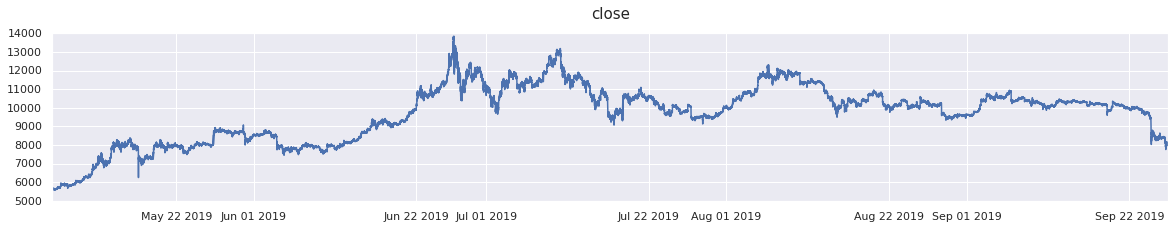

In [ ]:
timeSeriesPlot(df_prices_2019)

In [ ]:
df_prices_2019.to_csv('/gdrive/My Drive/TextAnalytics/datasets/df_prices_2019.csv')

In [ ]:
del df_prices_2019

# 2021

## Tweets on Bitcoin

In [ ]:
df_tweets_2021 = pd.read_csv("/gdrive/My Drive/TextAnalytics/datasets/iniziali/Bitcoin_tweets.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,3,5,6,7,8,9,10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df_tweets_2021['date'] = pd.to_datetime(df_tweets_2021['date'], errors='coerce')

df_tweets_2021 = df_tweets_2021.loc[np.isnat(df_tweets_2021['date']) == False]
len(df_tweets_2021.loc[np.isnat(df_tweets_2021['date'])])

0

In [ ]:
df_tweets_2021 = df_tweets_2021.drop_duplicates()

In [ ]:
df_tweets_2021 = df_tweets_2021.set_index(['date']).sort_index()

In [ ]:
df_tweets_2021

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,text,hashtags,source,is_retweet
date,,,,,,,,,,,,
2021-02-05 10:52:04,Iconic Holding,"Frankfurt am Main, Germany",Professional Crypto Asset Ventures \nhttps://t...,2021-01-05 13:22:24,301.0,1075,361,False,2⃣ Debunking 9 #Bitcoin Myths by @Patrick_Lo...,"['Bitcoin', 'cryptocurrency', 'bitcoin', 'cryp...",Twitter Web App,False
2021-02-05 10:52:04,Iconic Holding,"Frankfurt am Main, Germany",Professional Crypto Asset Ventures \nhttps://t...,2021-01-05 13:22:24,301.0,1075,361,False,📖 Weekend Read 📖\n\nKeen to learn about #cryp...,['crypto'],Twitter Web App,False
2021-02-05 10:52:06,Iconic Holding,"Frankfurt am Main, Germany",Professional Crypto Asset Ventures \nhttps://t...,2021-01-05 13:22:24,301.0,1075,361,False,4⃣ 🎙️ Bloomberg LP #CryptoOutlook 2021 with @...,"['CryptoOutlook', 'cryptocurrency', 'bitcoin',...",Twitter Web App,False
2021-02-05 10:52:07,Iconic Holding,"Frankfurt am Main, Germany",Professional Crypto Asset Ventures \nhttps://t...,2021-01-05 13:22:24,301.0,1075,361,False,"5⃣ #Blockchain 50 2021 by @DelRayMan, @Forbe...","['Blockchain', 'cryptocurrency', 'bitcoin', 'c...",Twitter Web App,False
2021-02-05 10:52:26,Nick Doevendans,"Edam-Volendam, Nederland","Amateur historicus m.n. WW2, schrijver, muziek...",2020-06-12 16:50:07,37.0,123,410,False,#reddcoin #rdd @reddcoin to the moon #altcoin ...,"['reddcoin', 'rdd', 'altcoin', 'turnreddcoinin...",Twitter for iPhone,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-30 23:59:56,Nitin Dass ∞/21M,United Kingdom,Bitcoiner | Trader | Truth seeker | Freedom ...,2020-10-25 12:23:58,265.0,415,15391,False,@HodlingCarla Wooohoooo 200k in sight #bitcoin...,['bitcoin'],Twitter for iPhone,False
2021-07-30 23:59:56,The Last Sat,Satlandia,Counting down to the last sat ever.\n#bitcoin,2020-09-14 04:00:03,3.0,18,11,False,"Before you know it we'll be under 90,000,000,0...","['Bitcoin', 'stayhumblestacksats']",Twitter for Android,False
2021-07-30 23:59:57,Air アーロン,Kings Canyon,"(E)sports psychology.\nWin the mind, win the g...",2021-02-15 21:42:55,64.0,451,920,False,#btc just hit Jackie Robinson,['btc'],Twitter for Android,False


In [ ]:
df_tweets_2021['user_created'] = pd.to_datetime(df_tweets_2021['user_created'])

In [ ]:
df_tweets_2021.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 720329 entries, 2021-02-05 10:52:04 to 2021-07-30 23:59:59
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_name         720311 non-null  object        
 1   user_location     391612 non-null  object        
 2   user_description  641525 non-null  object        
 3   user_created      720329 non-null  datetime64[ns]
 4   user_followers    720329 non-null  float64       
 5   user_friends      720329 non-null  object        
 6   user_favourites   720329 non-null  object        
 7   user_verified     720329 non-null  object        
 8   text              720329 non-null  object        
 9   hashtags          703515 non-null  object        
 10  source            716955 non-null  object        
 11  is_retweet        720269 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(10)
memory usage: 71.4+ MB


In [ ]:
df_tweets_2021.nunique()

user_name           157521
user_location        31590
user_description    141330
user_created        160571
user_followers       26115
user_friends         14822
user_favourites      53592
user_verified            4
text                710049
hashtags            179142
source                1023
is_retweet               1
dtype: int64

In [ ]:
df_tweets_2021.isna().sum()

user_name               18
user_location       328717
user_description     78804
user_created             0
user_followers           0
user_friends             0
user_favourites          0
user_verified            0
text                     0
hashtags             16814
source                3374
is_retweet              60
dtype: int64

In [ ]:
df_tweets_2021 = df_tweets_2021.drop(["user_location", "user_description"], axis=1)

In [ ]:
df_tweets_2021["is_retweet"].unique()

array([False, nan], dtype=object)

In [ ]:
df_tweets_2021 = df_tweets_2021.drop("is_retweet", axis=1)  # sono tutti valori uguali (non Retweet)

In [ ]:
df_tweets_2021 = df_tweets_2021.loc[df_tweets_2021["user_name"].isna() == False]

In [ ]:
df_tweets_2021.isna().sum()

user_name              0
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
text                   0
hashtags           16807
source              3374
dtype: int64

In [ ]:
df_tweets_2021["user_verified"].unique()

array(['False', 'True', False, True], dtype=object)

In [ ]:
df_tweets_2021['user_verified'] = df_tweets_2021['user_verified'].replace([False, True], ['False', 'True'])

In [ ]:
df_tweets_2021["user_verified"].unique()

array(['False', 'True'], dtype=object)

In [ ]:
df_tweets_2021["user_friends"] = df_tweets_2021["user_friends"].astype("float").astype("int")
df_tweets_2021["user_favourites"] = df_tweets_2021["user_favourites"].astype("float").astype("int")

In [ ]:
df_tweets_2021_temp = df_tweets_2021

In [ ]:
agg_dict = {'source': "count"}

df_tweets_2021_temp = df_tweets_2021_temp.groupby("source").agg(agg_dict)
df_tweets_2021_temp.columns = ["source_count"]

In [ ]:
df_tweets_2021_temp = df_tweets_2021_temp.sort_values("source_count")
df_tweets_2021_temp

,source_count
source,
PostBeyond,1
Shawagunk Journal,1
carbonreportstweet,1
Imminent News,1
Igorotage,1
...,...
dlvr.it,9709
IFTTT,11325
Twitter for iPhone,142287


In [ ]:
df_tweets_2021_temp = df_tweets_2021_temp.loc[df_tweets_2021_temp["source_count"] > 1000]
df_tweets_2021_temp["source_count"].sum()

649001

In [ ]:
sources = set(df_tweets_2021_temp.index.values)

In [ ]:
df_tweets_2021 = df_tweets_2021.loc[df_tweets_2021["source"].isin(sources)]

In [ ]:
del df_tweets_2021_temp

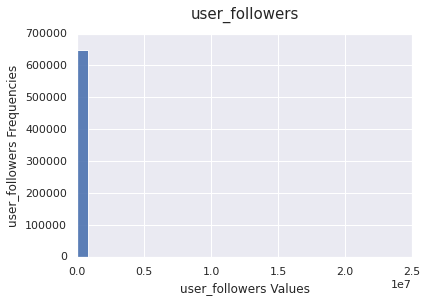

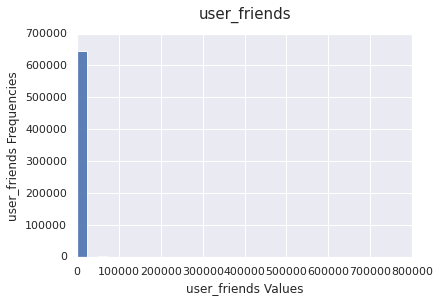

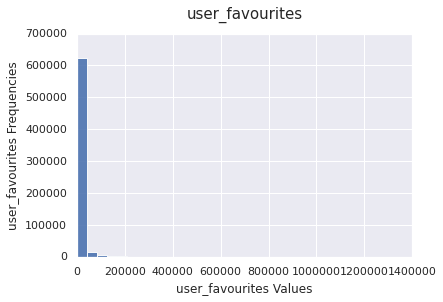

In [ ]:
binsN = round(np.log2(len(df_tweets_2021)) + 1)+10
histograms(df_tweets_2021, ["user_followers", "user_friends", "user_favourites"], binsN=binsN)

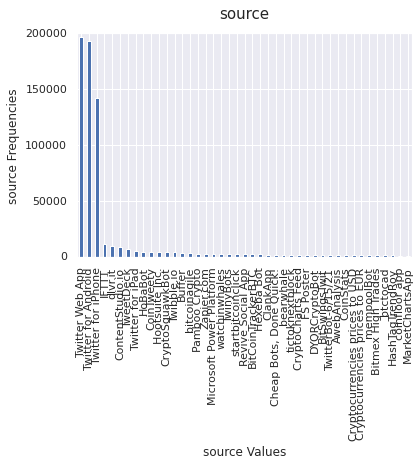

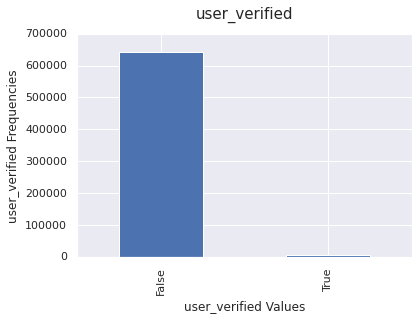

In [ ]:
brachart(df_tweets_2021, ["source", "user_verified"])

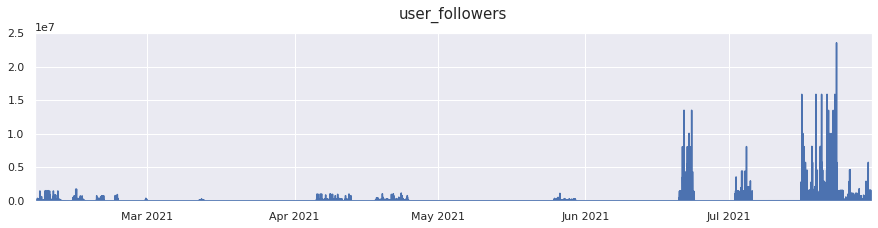

In [ ]:
timeSeriesPlot(df_tweets_2021["user_followers"])

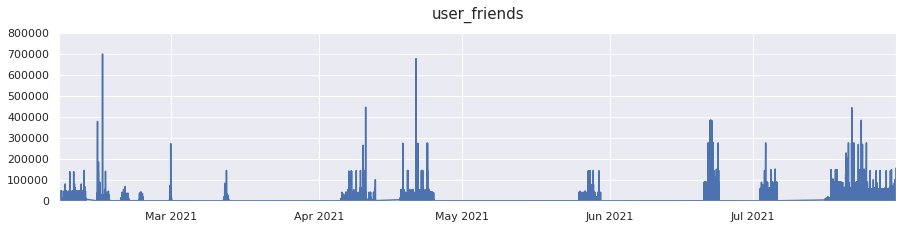

In [ ]:
timeSeriesPlot(df_tweets_2021["user_friends"])

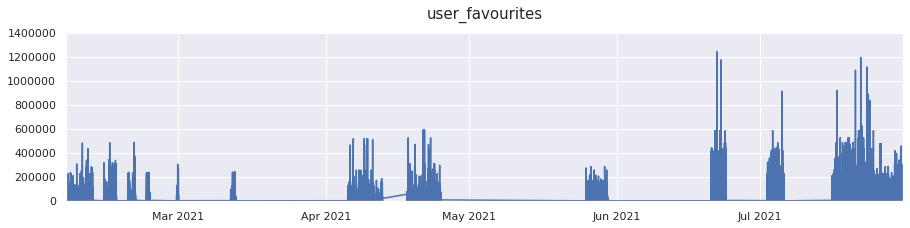

In [ ]:
timeSeriesPlot(df_tweets_2021["user_favourites"])

In [ ]:
df_tweets_2021

,user_name,user_created,user_followers,user_friends,user_favourites,user_verified,text,hashtags,source
date,,,,,,,,,
2021-02-05 10:52:04,Iconic Holding,2021-01-05 13:22:24,301.0,1075,361,False,2⃣ Debunking 9 #Bitcoin Myths by @Patrick_Lo...,"['Bitcoin', 'cryptocurrency', 'bitcoin', 'cryp...",Twitter Web App
2021-02-05 10:52:04,Iconic Holding,2021-01-05 13:22:24,301.0,1075,361,False,📖 Weekend Read 📖\n\nKeen to learn about #cryp...,['crypto'],Twitter Web App
2021-02-05 10:52:06,Iconic Holding,2021-01-05 13:22:24,301.0,1075,361,False,4⃣ 🎙️ Bloomberg LP #CryptoOutlook 2021 with @...,"['CryptoOutlook', 'cryptocurrency', 'bitcoin',...",Twitter Web App
2021-02-05 10:52:07,Iconic Holding,2021-01-05 13:22:24,301.0,1075,361,False,"5⃣ #Blockchain 50 2021 by @DelRayMan, @Forbe...","['Blockchain', 'cryptocurrency', 'bitcoin', 'c...",Twitter Web App
2021-02-05 10:52:26,Nick Doevendans,2020-06-12 16:50:07,37.0,123,410,False,#reddcoin #rdd @reddcoin to the moon #altcoin ...,"['reddcoin', 'rdd', 'altcoin', 'turnreddcoinin...",Twitter for iPhone
...,...,...,...,...,...,...,...,...,...
2021-07-30 23:59:56,Nitin Dass ∞/21M,2020-10-25 12:23:58,265.0,415,15391,False,@HodlingCarla Wooohoooo 200k in sight #bitcoin...,['bitcoin'],Twitter for iPhone
2021-07-30 23:59:56,The Last Sat,2020-09-14 04:00:03,3.0,18,11,False,"Before you know it we'll be under 90,000,000,0...","['Bitcoin', 'stayhumblestacksats']",Twitter for Android
2021-07-30 23:59:57,Air アーロン,2021-02-15 21:42:55,64.0,451,920,False,#btc just hit Jackie Robinson,['btc'],Twitter for Android


In [ ]:
df_tweets_2021['text'] = df_tweets_2021['text'].apply(lambda text: tweets_cleaner(text))


df_tweets_2021 = df_tweets_2021.loc[df_tweets_2021['text'].isna() == False]

df_tweets_2021 = df_tweets_2021.loc[df_tweets_2021['text'] != ""]

df_tweets_2021 = df_tweets_2021.loc[df_tweets_2021['text'].apply(lambda text: str.isdecimal(text)) == False]

In [ ]:
df_tweets_2021

,user_name,user_created,user_followers,user_friends,user_favourites,user_verified,text,hashtags,source
date,,,,,,,,,
2021-02-05 10:52:04,Iconic Holding,2021-01-05 13:22:24,301.0,1075,361,False,debunking bitcoin myths by patrick lowry crypt...,"['Bitcoin', 'cryptocurrency', 'bitcoin', 'cryp...",Twitter Web App
2021-02-05 10:52:04,Iconic Holding,2021-01-05 13:22:24,301.0,1075,361,False,weekend read keen to learn about crypto assets...,['crypto'],Twitter Web App
2021-02-05 10:52:06,Iconic Holding,2021-01-05 13:22:24,301.0,1075,361,False,bloomberg lp cryptooutlook with mikemcglone cr...,"['CryptoOutlook', 'cryptocurrency', 'bitcoin',...",Twitter Web App
2021-02-05 10:52:07,Iconic Holding,2021-01-05 13:22:24,301.0,1075,361,False,blockchain by delrayman forbes forbescrypto cr...,"['Blockchain', 'cryptocurrency', 'bitcoin', 'c...",Twitter Web App
2021-02-05 10:52:26,Nick Doevendans,2020-06-12 16:50:07,37.0,123,410,False,reddcoin rdd reddcoin to the moon altcoin turn...,"['reddcoin', 'rdd', 'altcoin', 'turnreddcoinin...",Twitter for iPhone
...,...,...,...,...,...,...,...,...,...
2021-07-30 23:59:56,Nitin Dass ∞/21M,2020-10-25 12:23:58,265.0,415,15391,False,hodlingcarla wooohoooo k in sight bitcoin t co...,['bitcoin'],Twitter for iPhone
2021-07-30 23:59:56,The Last Sat,2020-09-14 04:00:03,3.0,18,11,False,before you know it we ll be under sats left t ...,"['Bitcoin', 'stayhumblestacksats']",Twitter for Android
2021-07-30 23:59:57,Air アーロン,2021-02-15 21:42:55,64.0,451,920,False,btc just hit jackie robinson,['btc'],Twitter for Android


In [ ]:
df_tweets_2021.to_csv('/gdrive/My Drive/TextAnalytics/datasets/df_tweets_2021.csv')

In [ ]:
del df_tweets_2021

## Bitcoin Prices

In [ ]:
df_prices_2021 = pd.read_csv("/gdrive/My Drive/TextAnalytics/datasets/iniziali/Bitstamp_BTCUSD_2021_minute.csv")

df_prices_2021['date'] = pd.to_datetime(df_prices_2021['date'])
df_prices_2021 = df_prices_2021.set_index(['date'])

In [ ]:
start_date = "2021-02-05 10:51:00"
end_date = "2021-07-30 23:59:59"
df_prices_2021 = filter_df(df_prices_2021, df_prices_2021.index, lower_bound=start_date, upper_bound=end_date)
df_prices_2021 = df_prices_2021.sort_index()

In [ ]:
df_prices_2021 = df_prices_2021["close"]
df_prices_2021 = df_prices_2021.drop_duplicates()

In [ ]:
df_prices_2021

date
2021-02-05 10:51:00    37479.56
2021-02-05 10:52:00    37449.80
2021-02-05 10:53:00    37430.00
2021-02-05 10:54:00    37430.96
2021-02-05 10:55:00    37473.12
                         ...   
2021-07-30 23:55:00    42130.00
2021-07-30 23:56:00    42122.38
2021-07-30 23:57:00    42222.20
2021-07-30 23:58:00    42278.67
2021-07-30 23:59:00    42234.89
Name: close, Length: 232665, dtype: float64

In [ ]:
print( "max price: {0}, on Date: {1}".format(df_prices_2021.max(), df_prices_2021.idxmax()) )
print( "median price: {0}".format(df_prices_2021.median()) )
print( "min price: {0}, on Date: {1}".format(df_prices_2021.min(), df_prices_2021.idxmin()) )

max price: 64859.3, on Date: 2021-04-14 06:13:00
median price: 47633.8
min price: 28839.68, on Date: 2021-06-22 13:55:00


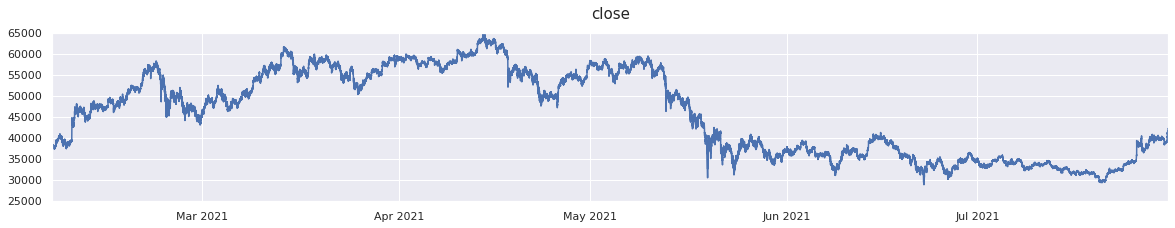

In [ ]:
timeSeriesPlot(df_prices_2021)

In [ ]:
df_prices_2021.to_csv('/gdrive/My Drive/TextAnalytics/datasets/df_prices_2021.csv')

In [ ]:
del df_prices_2021